## Q1 

In [11]:
# import data
data <- read.csv("A2.csv", sep = ",")
x <- data[[6]]
y <- data[[7]]

[1] 39

#### A. plot the data
Along with the fitted line below
#### B. Fit a model
To make it shorter, I'll refer "population of a location on Earth" as "population", and "peak membership" as "membership". <br>
Since peak membership will be 0 if population is 0 <br>
$\beta_0 = 0$, the chosen model is $y = \beta_1 x + e$

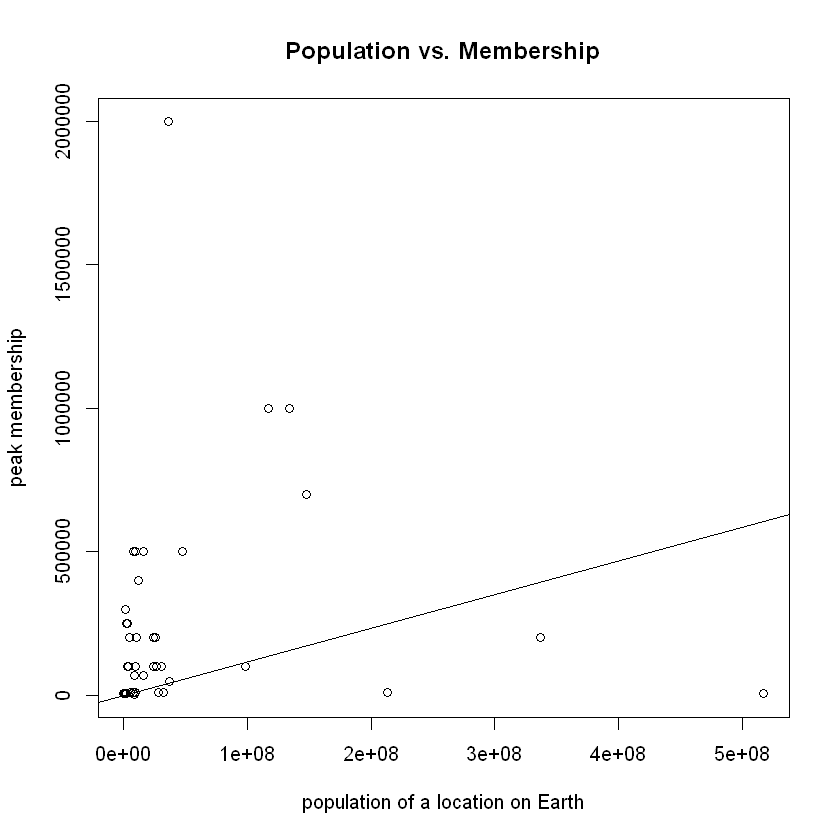

In [3]:
plot(x,y, xlab = "population of a location on Earth", ylab = "peak membership", main = "Population vs. Membership")
fit <- lm(y~-1+x)
abline(fit)

#### C. Assess the adequacy
Using scale-location plot to examine whether the variance is constant. <br>
The scale-location plot indicates the variance increases with population. <br>

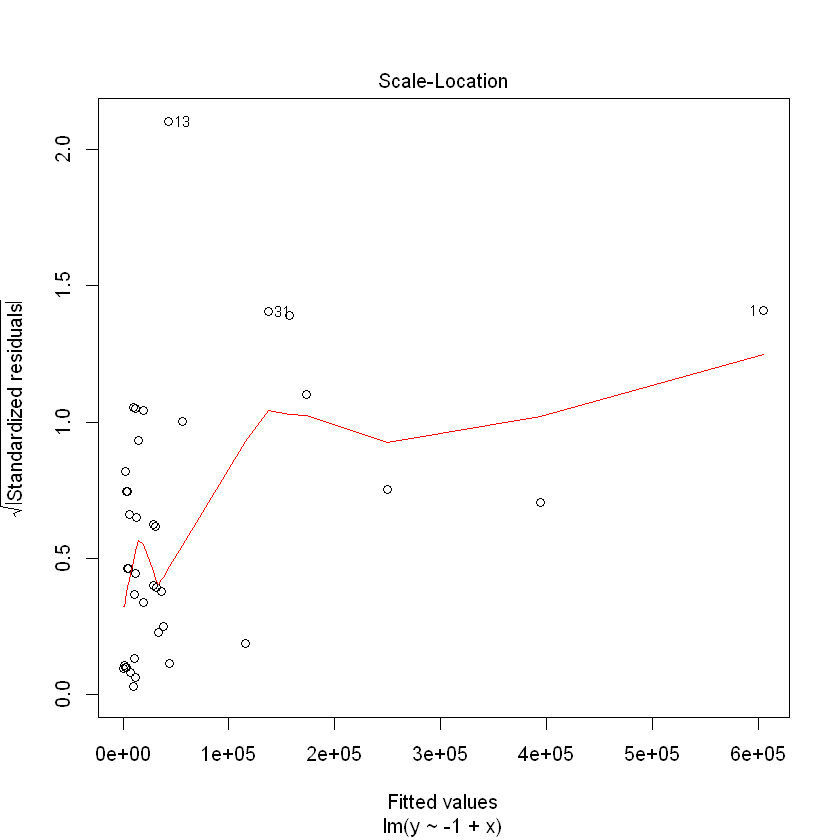

In [4]:
plot(fit, which = 3)

#### D. Try transformations

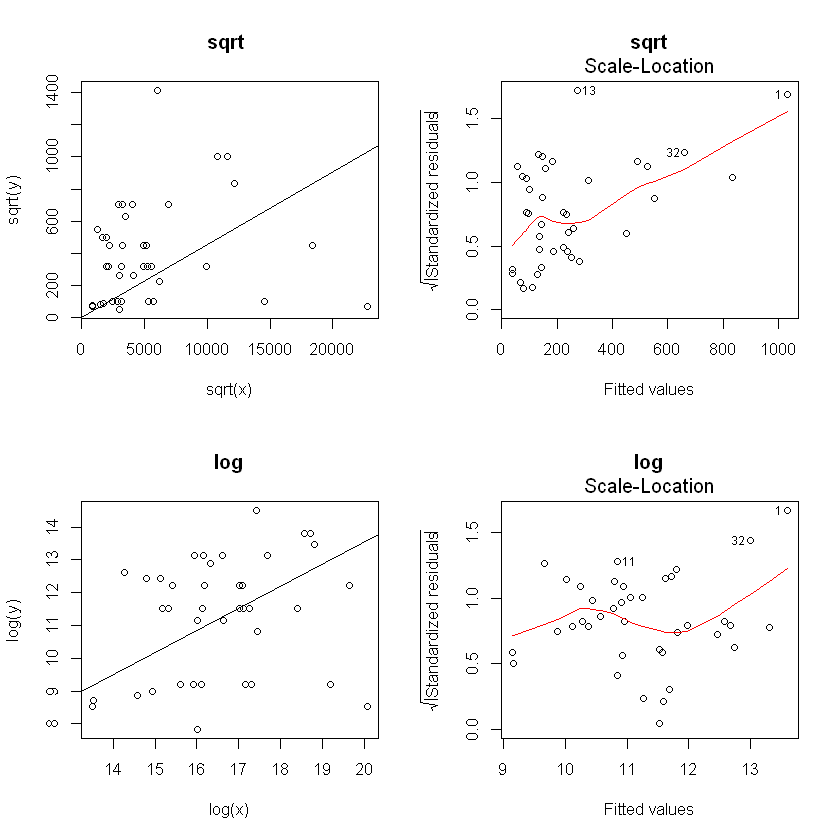

In [5]:
par(mfrow = c(2,2))

# try a sqrt transf on both x and y
fit_sqrt <- lm(sqrt(y)~-1+sqrt(x))
plot(sqrt(x), sqrt(y), main = "sqrt ")
abline(fit_sqrt)
plot(fit_sqrt, which = 3, main = "sqrt")

# try a log transf on both x and y
fit_log <- lm(log(y)~-1+log(x))
plot(log(x), log(y), main = "log")
abline(fit_log)
plot(fit_log, which = 3, main = "log")

The log transformation looks best, since it stabilizing the variance among the region that most points occurs

#### E. Examine outliners and leverage points
Since the data set is small (39 data points), <br>
The leverage points will have $h_{ii} \geq 4/39$. <br>
The outliers will have $r_i > 2$

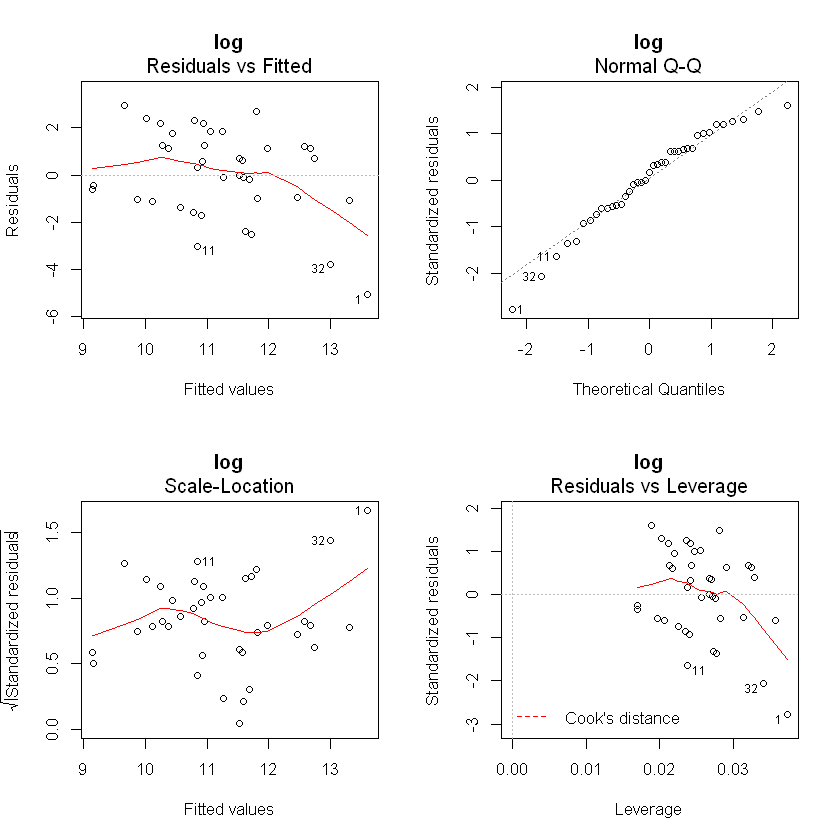

In [27]:
par(mfrow=c(2,2))
plot(fit_log, main = "log")

From the plots above, we can see some outliers (points labelled 11, 32, 1 in scale location plot) and no leverage points.

#### F. Examine the validity of influential points 
I don't have enough knowledge to examine the validity of these data points, hence I will report the results with and without the influential points. 

#### M. Remove influential points and refit

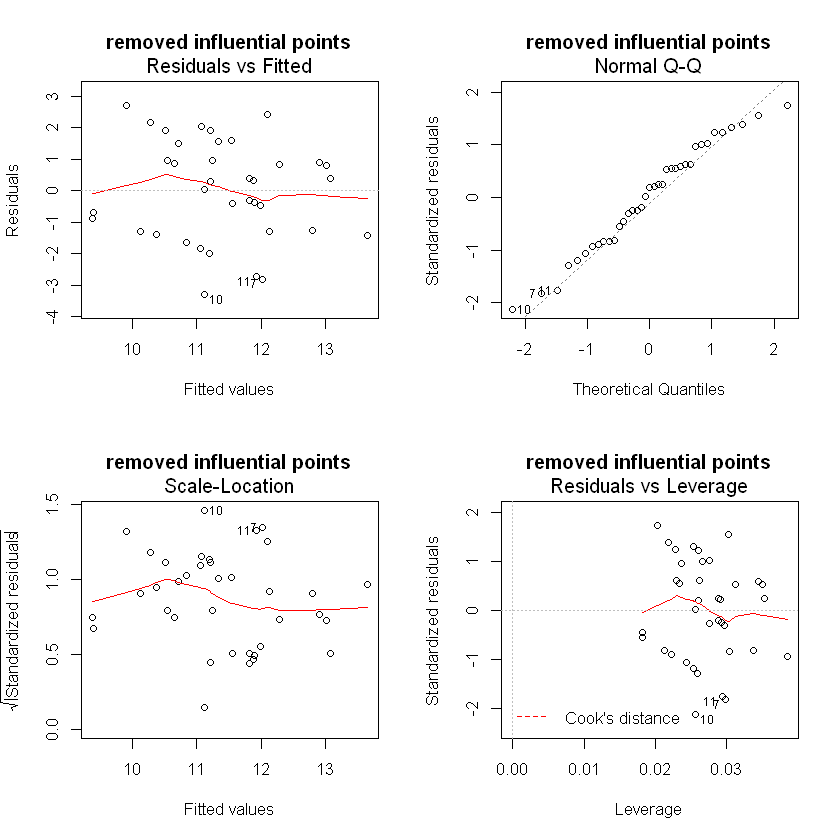

In [28]:
h_lev <- hatvalues(fit_log) > (4/length(x))
outlier <- abs(rstandard(fit_log)) > 2
x_r <- x[!h_lev & !outlier]
y_r <- y[!h_lev & !outlier]
fit_r <- lm(log(y_r)~-1+log(x_r))
par(mfrow=c(2,2))
plot(fit_r, main = "removed influential points")

#### J. Examine the data size
The data set is small.
#### K. Examine normality 
From the Normal Q-Q plot above, the error is normally distributed. 
#### M. Examine associations between Y and x
We will do the t-test with hypothesis $H_0: \beta_1 = 0$

In [29]:
summary(fit_log)
summary(fit_r)


Call:
lm(formula = log(y) ~ -1 + log(x))

Residuals:
    Min      1Q  Median      3Q     Max 
-5.0712 -1.0580  0.3127  1.2413  2.9497 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
log(x)  0.67727    0.01791   37.82   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.861 on 38 degrees of freedom
Multiple R-squared:  0.9741,	Adjusted R-squared:  0.9734 
F-statistic:  1430 on 1 and 38 DF,  p-value: < 2.2e-16



Call:
lm(formula = log(y_r) ~ -1 + log(x_r))

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2921 -1.2777  0.3064  0.9708  2.7019 

Coefficients:
         Estimate Std. Error t value Pr(>|t|)    
log(x_r)  0.69464    0.01566   44.35   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.569 on 36 degrees of freedom
Multiple R-squared:  0.982,	Adjusted R-squared:  0.9815 
F-statistic:  1967 on 1 and 36 DF,  p-value: < 2.2e-16


In both cases (with and without removing the influential points), we can reject $H_0$ by the t-test.  
Therefore, there is a strong association between $Y$ and $x$. 
#### N. Confidence Interval 

In [32]:
confint(fit_log)
confint(fit_r)

,2.5 %,97.5 %
log(x),0.6410179,0.713519


,2.5 %,97.5 %
log(x_r),0.6628685,0.7264024


For the model without the influential points removed, the confidence interval is:
$$(0.641, 0.714)$$

For the model with the influential points removed, the confidence interval is:
$$(0.662, 0.726)$$